# Linear Regression Example

Implement Linear Regression for Boston House Price Problem

In [2]:
# import plugin
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from matplotlib.animation import FuncAnimation
import re

In [21]:
"""
Part-01: Linear Regression
"""

housing_price = load_boston()
housing_price
data = pd.DataFrame(housing_price['data'])
data.columns = housing_price['feature_names']
data['price'] = housing_price['target']
data.head(5)

# sns.heatmap(data.corr(), annot=True, fmt = '.1f')
# plt.show()

print(data.columns)

rm = data['RM']
lst = data['LSTAT']
target = data['price']

print(f'rm: {rm}')

def model(x, w, b):
    return np.dot(x, w.T) + b


def loss(yhat, y):
    return np.mean((yhat-y) **2 )

def partial_w(x1, x2, y, yhat):
    return np.array([2 *np.mean((yhat - y) * x1), 2 * np.mean((yhat - y) * x2)])


def partial_b(x1, x2, y, yhat):
    return 2 * np.mean((yhat - y))



w = np.random.random_sample((1, 2))
print(w)

b = 0
alpha  = 1e-5

epoch = 200
history = []

history_k_b_loss = []

for e in range(epoch):
    losses = []
    for batch in range(len(rm)):
        random_index = random.choice(range(len(rm)))

        x1, x2 = rm[random_index], lst[random_index]

        y = target[random_index]

        yhat = model(np.array([x1,x2]), w, b)

        loss_v = loss(yhat, y)

        w = w - partial_w(x1, x2, y, yhat) * alpha
        b = b - partial_b(x1, x2, y, yhat) * alpha

        losses.append(loss_v)

        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss: {}'.format(e, batch, np.mean(losses)))

    history.append(np.mean(losses))










Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')
rm: 0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64
[[0.60999771 0.87440409]]
Epoch: 0, Batch: 0, loss: 10.51332565026214
Epoch: 0, Batch: 100, loss: 164.55146162661143
Epoch: 0, Batch: 200, loss: 249.17381254862812
Epoch: 0, Batch: 300, loss: 242.0228768985855
Epoch: 0, Batch: 400, loss: 236.89226997391987
Epoch: 0, Batch: 500, loss: 233.50181924410924
Epoch: 1, Batch: 0, loss: 66.391902929492
Epoch: 1, Batch: 100, loss: 279.2669599458504
Epoch: 1, Batch: 200, loss: 227.3057847417963
Epoch: 1, Batch: 300, loss: 207.9258395508882
Epoch: 1, Batch: 400, loss: 199.87090558248764
Epoch: 1, Batch: 500, loss: 212.95621606409168
Epoch: 2, Batch: 0, loss: 127.02266140705986
Epoch: 2, Batch: 100, loss: 167.51816066632063
Ep

# Logstic Regression

23.53


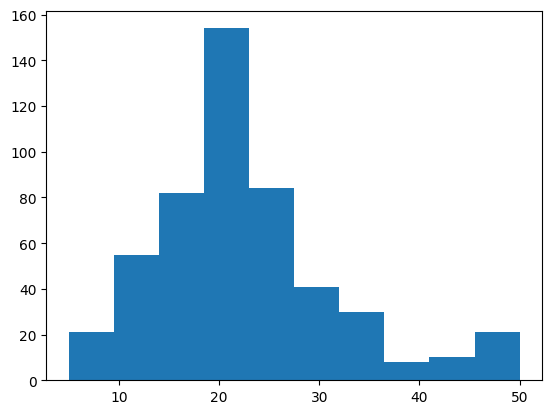

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  expensive  
0     15.3  396.90   4.98   24.0          1  
1     17.8  396.90   9.14   21.6          0  
2     17.8  392.83   4.03   34.7          1  
3     18.7  394.63   2.94   33.4          1  
4     18.7  396.90   5.33   36.2          1  
[[0.53360698 0.17499173]]
Epoch: 0, Batch: 0, loss: 32.64538220322831
Epoch: 0, Batch: 100, loss: 32.64538220322831
Epoch: 0, Batch: 200, loss: 32.645382203228316
Epoch: 0, Batch: 300, loss: 32.64538220322831
Epoch: 0, Batch: 400, loss: 32.645382203228316
Epoch: 0, Batch: 500, loss: 3

In [28]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from matplotlib.animation import FuncAnimation
import re

price = data['price']

print(np.percentile(price, 66))

plt.hist(price)
plt.show()

data['expensive'] = data['price'].apply(lambda p: int(p > np.percentile(price, 66)))
expensive = data['expensive']

print(data.head(5))

def logistic(x):
    return 1/ (1 + np.exp(-1))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -1 * np.sum(y*np.log(yhat) + (1-y) * np.log(1-yhat))

def partial_w(x1, x2, y, yhat):
    return np.array([np.sum((yhat-y) *x1), np.sum((yhat - y) * x2)])

def partial_b(x, x2, y, yhat):
    return np.sum(yhat - y)

w = np.random.random_sample((1, 2))
print(w)

b = 0
alpha = 1e-5

epoch = 200
history = []

history_k_b_loss = []

for e in range(epoch):
    losses = []
    for batch in range(len(rm)):
        random_index = random.choice(range(len(rm)))

        x1, x2 = rm[random_index], lst[random_index]
        y = expensive[random_index]

        yhat = model(np.array([x1, x2]), w, b)

        w = w - partial_w(x1, x2, y, yhat) * alpha
        b = b - partial_b(x1, x2, y, yhat) * alpha

        losses.append(loss_v)

        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss: {}'.format(e, batch, np.mean(losses)))

    history.append(np.mean(losses))

predicated = [model(np.array([x1, x2]), w, b) for x1, x2 in zip(rm ,lst)]
true = expensive


def accuracy(y, yhat):
    return sum(1 if i == j else 0 for i, j in zip(y, yhat))/ len(y)

print(accuracy(true, predicated))


# decision boundary